# EDA  sobre Iniciativas Legislativas (IL)
**OBJETIVO GENERAL** 

Identificar atributos y clasificar iniciativas legislativas sobre Salud iniciadas en la Càmara de Diputados utilizando datos abiertos y tècnicas de Machine Learning:

**CONSIDERACIONES**

Se denominan proyectos a las iniciativas legislativas de los Diputados, Senadores y Poder Ejecutivo. Hay distintos tipos de proyectos:
* Proyectos de ley: destinados a crear, modificar, sustituir o abrogar una ley, institución o norma de caracter general.
* Proyectos de resolución: destinados a la adopción de medidas relativas a la composición u organización interna del cuerpo, las modificaciones del reglamento y, en general, de toda disposición de carácter imperativo que pueda adoptar la Cámara.
* Proyectos de declaración: destinados a expresar una opinión del cuerpo sobre cualquier hecho de carácter público o privado, o manifestar la voluntad de que el Poder Ejecutivo practique algún acto en particular.

Se identifica inicialmente IL de Salud a aquellas iniciativas que pasaron por la comisión permanente 'ACCION SOCIAL Y SALUD PUBLICA' o cuya comisión presenta el concepto 'SALUD' en su denominación.

**DATOS**

* Iniciativas legislativas recolectadas entre 03/03/2008 a 28/06/2024 cuya càmara de origin es Diputado.
    * Total de proyectos : 100913

**Fuentes de datos**
* Proyectos parlamentarios: Iniciados desde el período parlamentario 126º (01/03/2008) y que tuvieron tratamiento en la H. Cámara de Diputados. Documentación http://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION - PROYECTOS PARLAMENTARIOS.pdf
* Giro a comisiones: Remisión de expedientes a las comisiones parlamentarias para su dictamen. Comisiones parlamentarias de la Cámara de Diputados que recibieron expedientes para dictaminar, en proyectos ingresados desde el período parlamentario 126° (01/03/2008). Los proyectos ingresados a la Cámara son girados a las comisiones que tengan incumbencia según lo fijado por el reglamento o por norma respectiva, para que se expida. Documentaciòn http://www4.hcdn.gob.ar/Datos_doc/Documentacion-giro comisiones.pdf
Cuando un proyecto fue girado a más de una comisión, el campo proyecto_id estará repetido. Pero chequear si es posible que sea girado màs de una vez a una misma comisiòn.
* Resultado de proyecto: Últimos movimientos y resultados de los proyectos parlamentarios con tratamiento en la H. Cámara de Diputados que se iniciaran desde el período parlamentario 126º (01/03/2008).Documentación http://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION – resultado proyectos.pdf

**Diccionario de datos**

* proyecto_id: identificador único de registro.
* publicación_fecha: Fecha en que se publicara el proyecto, ya sea que fuera publicado en cualquier publicación del Congreso, o sin publicación, se registra el primer movimiento en Comisión o en Recinto.
* publicacion_id: identificador único de la publicación correspondiente. (ver dataset ‘Publicaciones’ [https://datos.hcdn.gob.ar/dataset/publicaciones/resource/9ef22cd7-b7d8-47a6-bbf3-79095d47275c] En proyectos iniciados en la Cámara de Senadores, este valor será nulo. También será nulo cuando el proyecto no tuviere publicación por ser iniciado en recinto o dictamen directo en comisión.
* camara_origen: Cámara donde se inició el expediente; Diputados o Senadores.
* expediente_diputados: Número, identificador y año del expediente.
* expediente_senado: Número, identificador y año del expediente, cuando el expediente se girara al Senado.
* proyecto_tipo: tipo de proyecto que puede ser de ley, de resolución o declaración.
* giro_a_comisiones: Cantidad de veces en que un proyecto(proyecto:id) fue girado a comisiònes.Última actualización de los metadatos Agosto 8, 2019 de la fuente de datos. Pero si se mergea con la fuente de proyectos se logra mergear con proyectos hasta el 2024-02-29.
* proyecto_girado_a_comisiones_SALUD: si es 1 paso por alguna comisión de SALUD, sino 0.
* cabecera: indica que es el expediente principal; si el valor fuera un identificador de expediente se refiere al expediente principal en el dictamen. Cuando el valor fuere nulo, puede que: a) no tuvo dictamen de comisión o b) tuvo dictamen exclusivamente sobre ese proyecto. Valores de identificador de expedientes enlazado al dataset ‘proyectos parlamentarios’ (https://datos.hcdn.gob.ar/dataset/proyectos-parlamentarios/resource/22b2d52c-7a0e-426bac0a-a3326c388ba6).
* dictamen_tipo: Tipo de dictamen resuelto por la comisión. Puede ser ‘Orden del Día’, ‘Dictamen Sin Nro.’, ‘Artículo 114’, ‘Artículo 204’. Si el valor es nulo, no existió dictamen.
* OD_numero: cuando se trate de una “Orden del día” el número de la misma.
* OD_publicacion: Corresponde a la fecha de publicación o sea impresión de la Orden del Día,comienza el plazo de las Observaciones.
* fecha: del último movimiento y/o resultado.
* resultado: resultado que tuvo el expediente en la Cámara de Diputados. Ultima actualización 11 de julio de 2019, 13:48 (UTC-03:00) pero cuando se mergee logramos 2023-12-07. Estados: NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN. RETIRADO. RECHAZADO. APROBADO. MEDIA SANCION. SANCIONADO. Ver por tipo de proyecto la relacion con los estados.
* es_ley = indica si el proyecto se convirtio en ley. Esta relacionada al tipo de proyecto.



In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import pickle
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configurar path
os.chdir('C:/iamas_datos2024/proyectos_parlamentarios/')
pd.set_option('display.max_colwidth', None)

C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exploración inicial de datos - EDA

In [2]:
# Deserialize the object from the binary file
with open('proyecto_df.pkl', 'rb') as file:
    proyecto_df = pickle.load(file)


In [3]:
proyecto_df.columns

Index(['id', 'proyecto_id', 'titulo', 'publicacion_fecha', 'publicacion_id',
       'camara_origen', 'exp_diputados', 'exp_senado', 'tipo',
       'giros_a_comisiones', 'proyecto_girado_a_comisiones_SALUD',
       'expediente_id', 'cabecera', 'dictamen_tipo', 'od_numero',
       'od_publicacion', 'fecha', 'resultado', 'es_ley'],
      dtype='object')

In [4]:
proyecto_df.head(3)

,id,proyecto_id,titulo,publicacion_fecha,publicacion_id,camara_origen,exp_diputados,exp_senado,tipo,giros_a_comisiones,proyecto_girado_a_comisiones_SALUD,expediente_id,cabecera,dictamen_tipo,od_numero,od_publicacion,fecha,resultado,es_ley
0,0,HCDN276217,PEDIDO DE INFORMES AL PODER EJECUTIVO SOBRE DIVERSAS CUESTIONES RELACIONADAS CON los programas nacionales de asistencia y acompañamiento a la niñez y juventud vulnerables.,2024-06-24,HCDN142TP080,Diputados,3297-D-2024,NaN,RESOLUCION,NaN,SIN COMISION ASOCIADA,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,1,HCDN276218,"EXPRESAR ADHESIÓN Al “Día Internacional de las Microempresas y las Pequeñas y Medianas Empresas - MiPyME -”, que se conmemora el 27 de junio de cada año.",2024-06-24,HCDN142TP080,Diputados,3294-D-2024,NaN,RESOLUCION,NaN,SIN COMISION ASOCIADA,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,2,HCDN276210,inStitúyase el 24 de junio de cada año como “Día Nacional del Deporte Argentino”.,2024-06-24,HCDN142TP080,Diputados,3293-D-2024,NaN,LEY,NaN,SIN COMISION ASOCIADA,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [5]:
proyecto_df.columns

Index(['id', 'proyecto_id', 'titulo', 'publicacion_fecha', 'publicacion_id',
       'camara_origen', 'exp_diputados', 'exp_senado', 'tipo',
       'giros_a_comisiones', 'proyecto_girado_a_comisiones_SALUD',
       'expediente_id', 'cabecera', 'dictamen_tipo', 'od_numero',
       'od_publicacion', 'fecha', 'resultado', 'es_ley'],
      dtype='object')

In [6]:
# EDA
proyecto_df[['tipo','giros_a_comisiones', 'proyecto_girado_a_comisiones_SALUD','resultado']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tipo,100913,5,RESOLUCION,45543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
giros_a_comisiones,98469.0,NaN,NaN,NaN,1.534747,0.788111,1.0,1.0,1.0,2.0,8.0
proyecto_girado_a_comisiones_SALUD,100913,3,OTRAS COMISIONES,87944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resultado,97967,6,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,83989,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Controlar nulos
proyecto_df.isnull().mean().sort_values(ascending=False).head(15)


es_ley                                0.993638
exp_senado                            0.987435
fecha                                 0.861485
od_publicacion                        0.840348
cabecera                              0.836453
dictamen_tipo                         0.835343
expediente_id                         0.029193
resultado                             0.029193
od_numero                             0.029193
giros_a_comisiones                    0.024219
publicacion_id                        0.007056
titulo                                0.000000
proyecto_id                           0.000000
id                                    0.000000
proyecto_girado_a_comisiones_SALUD    0.000000
dtype: float64

tipo
RESOLUCION                   45543
LEY                          36136
DECLARACION                  18214
MENSAJE                        727
MENSAJE Y PROYECTO DE LEY      293
Name: count, dtype: int64

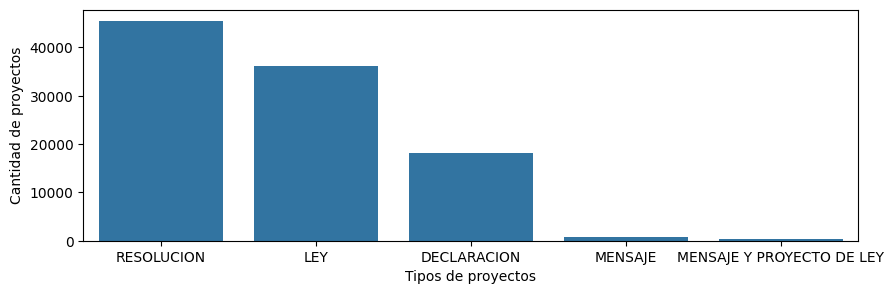

In [8]:
plt.figure(figsize=(10, 3))
sns.countplot(x='tipo', data=proyecto_df)
plt.xlabel("Tipos de proyectos")
plt.ylabel("Cantidad de proyectos")
display(proyecto_df['tipo'].value_counts())

proyecto_girado_a_comisiones_SALUD
OTRAS COMISIONES         87944
COMISIONES DE SALUD      10525
SIN COMISION ASOCIADA     2444
Name: count, dtype: int64

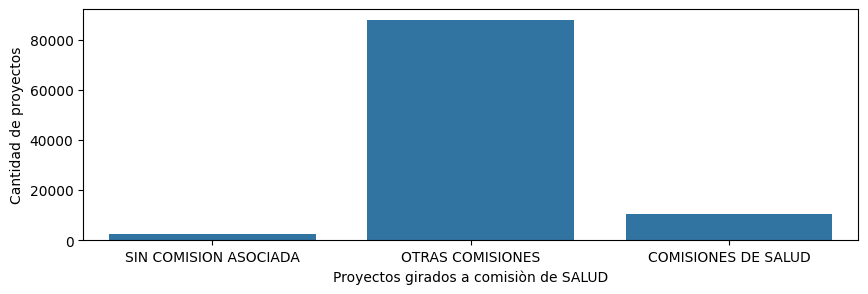

In [9]:
plt.figure(figsize=(10, 3))
sns.countplot(x='proyecto_girado_a_comisiones_SALUD', data=proyecto_df)
plt.xlabel("Proyectos girados a comisiòn de SALUD")
plt.ylabel("Cantidad de proyectos")
display(proyecto_df['proyecto_girado_a_comisiones_SALUD'].value_counts())


Text(0, 0.5, 'Cantidad de proyectos')

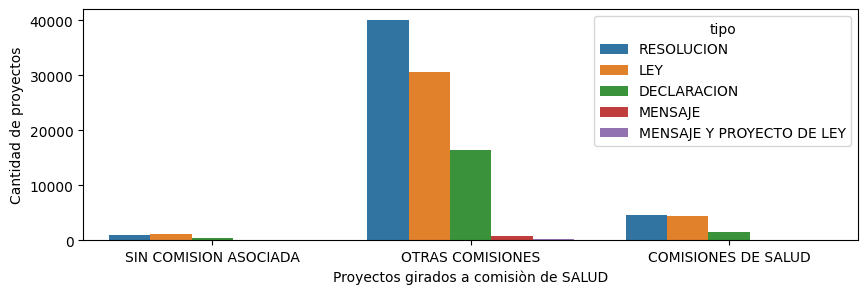

In [10]:
plt.figure(figsize=(10, 3))
sns.countplot(x='proyecto_girado_a_comisiones_SALUD', data=proyecto_df, hue = 'tipo')
plt.xlabel("Proyectos girados a comisiòn de SALUD")
plt.ylabel("Cantidad de proyectos")

In [11]:
# Variable target , binaria 0: no es ley, 1 es ley. Ver que pasa cuando hay 2
proyecto_df = proyecto_df.fillna({'es_ley':0})
proyecto_df.loc[proyecto_df['es_ley']>1,'es_ley']=1

In [12]:
# Controlar proyectos que son ley
pd.crosstab(proyecto_df.tipo, proyecto_df.es_ley)

es_ley,0.0,1.0
tipo,,
DECLARACION,18213,1
LEY,35654,482
MENSAJE,725,2
MENSAJE Y PROYECTO DE LEY,137,156
RESOLUCION,45542,1


In [13]:
# Explorar proyectos que son declaraciòn, mensaje y resoluciòn
proyecto_df.loc[(proyecto_df['es_ley']==1) & (proyecto_df['tipo'].isin(['DECLARACION','MENSAJE','RESOLUCION'])==True),['proyecto_id','titulo','tipo','resultado','es_ley', 'cabecera',
       'dictamen_tipo', 'od_numero', 'od_publicacion']]#.es_ley

,proyecto_id,titulo,tipo,resultado,es_ley,cabecera,dictamen_tipo,od_numero,od_publicacion
46160,HCDN186500,"CAPITAL NACIONAL DE LA PELOTA DE FUTBOL. SE DECLARA COMO TAL A LA CIUDAD DE BELL VILLE, DEPARTAMENTO UNION, PROVINCIA DE CORDOBA.",RESOLUCION,NaN,1.0,NaN,NaN,NaN,NaN
53670,HCDN172568,"DECLARAR ""CIUDAD DE LAS ARTES Y LAS IDEAS"", AL MUNICIPIO DE ALMIRANTE BROWN, PROVINCIA DE BUENOS AIRES.",DECLARACION,MEDIA SANCION,1.0,cabecera,Orden del Dia,2102.0,2015-06-18T00:00:00
85297,HCDN151850,"REMISION DE LA CUENTA DE INVERSION CORRESPONDIENTE AL EJERCICIO FISCAL 2009, CONFORME A LOS TERMINOS DEL ARTICULO 75, INCISO 8 DE LA CONSTITUCION NACIONAL.",MENSAJE,MEDIA SANCION,1.0,cabecera,Orden del Dia,1986.0,2013-05-10T00:00:00
97996,HCDN102616,"REMITE LA CUENTA DE INVERSION CORRESPONDIENTE AL EJERCICIO FISCAL 2007, CONFORME A LOS TERMINOS DEL ARTICULO 75, INCISO 8 DE LA CONSTITUCION NACIONAL.",MENSAJE,MEDIA SANCION,1.0,cabecera,Orden del Dia,648.0,2012-08-13T00:00:00


In [14]:
# Resultados
# Estado de los expedientes parlamentarios
# Segùn sitio ,  ultima actualización	11 de julio de 2019, 13:48 (UTC-03:00) pero cuando se mergee logramos 2023-12-07
resultado_df = pd.read_csv('diputados/resultado_proyectos1.8.csv')
print('Tamaño de dataset de Resultado:',resultado_df.shape)
display(resultado_df.head())

Tamaño de dataset de Resultado: (103822, 7)


,expediente_id,cabecera,dictamen_tipo,od_numero,od_publicacion,fecha,resultado
0,HCDN261442,HCDN261442,Orden del Dia,721.0,2023-07-06T00:00:00,NaN,NaN
1,HCDN118409,HCDN118409,Orden del Dia,1291.0,2010-09-28T00:00:00,NaN,NaN
2,HCDN118409,HCDN118409,Orden del Dia,1291.0,2010-09-28T00:00:00,NaN,NaN
3,HCDN255496,HCDN255496,Orden del Dia,532.0,2022-11-17T00:00:00,NaN,NaN
4,HCDN126867,HCDN126867,Orden del Dia,2152.0,2011-05-10T00:00:00,NaN,NaN


In [15]:
id_list = list(proyecto_df.loc[(proyecto_df['es_ley']==1) & (proyecto_df['tipo'].isin(['DECLARACION','MENSAJE','RESOLUCION'])==True),('proyecto_id')])
id_list
resultado_df[resultado_df.expediente_id.isin(id_list)]

,expediente_id,cabecera,dictamen_tipo,od_numero,od_publicacion,fecha,resultado
313,HCDN151850,cabecera,Orden del Dia,1986.0,2013-05-10T00:00:00,2013-06-05T00:00:00,MEDIA SANCION
65907,HCDN102616,HCDN102616,Orden del Dia,648.0,2012-08-13T00:00:00,NaN,NaN
77990,HCDN172568,cabecera,Orden del Dia,2102.0,2015-06-18T00:00:00,2015-07-15T00:00:00,MEDIA SANCION
84655,HCDN151850,HCDN151850,Orden del Dia,1986.0,2013-05-10T00:00:00,NaN,NaN
98542,HCDN102616,cabecera,Orden del Dia,648.0,2012-08-13T00:00:00,2012-10-10T00:00:00,MEDIA SANCION


Text(0, 0.5, 'Cantidad de proyectos')

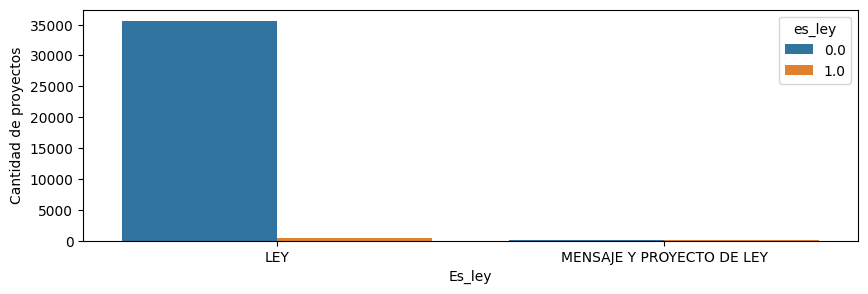

In [16]:
# Controlar
# Variable target , binaria 0: no es ley, 1 es ley. Ver que pasa cuando hay 2
#proyecto_df = proyecto_df.fillna({'es_ley':0})
#proyecto_df.loc[proyecto_df['es_ley']>1,'es_ley']=1

plt.figure(figsize=(10, 3))
sns.countplot(x='tipo', data = proyecto_df[proyecto_df['tipo'].isin(['LEY','MENSAJE Y PROYECTO DE LEY'])], hue = 'es_ley')
plt.xlabel("Es_ley")
plt.ylabel("Cantidad de proyectos")

Text(0.5, 9.444444444444438, 'giro a comisiones')

<Figure size 1000x300 with 0 Axes>

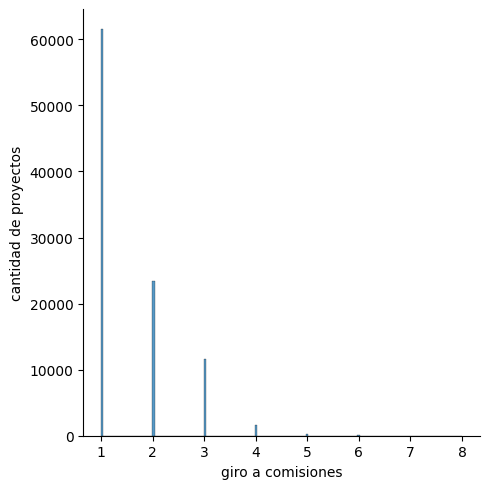

In [17]:
plt.figure(figsize=(10, 3))
sns.displot(data = proyecto_df,
x = 'giros_a_comisiones'
)
plt.ylabel("cantidad de proyectos")
plt.xlabel("giro a comisiones")

Text(0.5, 0, 'tipos de proyectos')

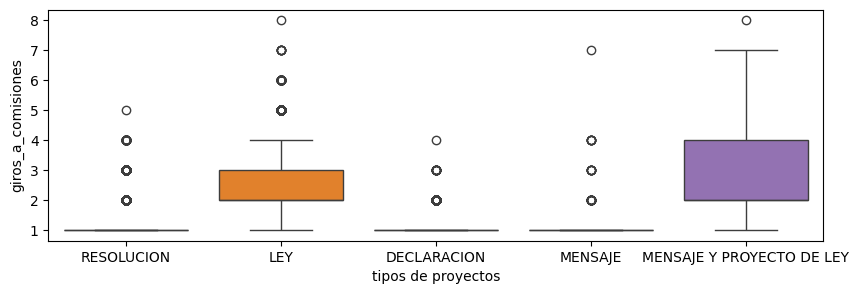

In [18]:
plt.figure(figsize=(10, 3))
sns.boxplot(proyecto_df,
 x = 'tipo', y = 'giros_a_comisiones',hue = 'tipo'
)
plt.ylabel("giros_a_comisiones")
plt.xlabel("tipos de proyectos")

In [19]:
# Limpiar fechas
proyecto_df['añomes'] = proyecto_df['publicacion_fecha'].dt.to_period('m')
proyecto_df['año'] = proyecto_df['publicacion_fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27484\3768904663.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  proyecto_df['añomes'] = proyecto_df['publicacion_fecha'].dt.to_period('m')


In [20]:
ano_mes_df = pd.pivot_table(proyecto_df, values=['proyecto_id'], index=['año','tipo'],
                       aggfunc={'proyecto_id': "count"}).reset_index()


In [21]:
temp = proyecto_df['año'].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27484\1688427867.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=temp.index, y=temp.values, palette="tab10", linestyle='--')


<Axes: xlabel='Año (publicaciòn)', ylabel='Cantidad de expedientes'>

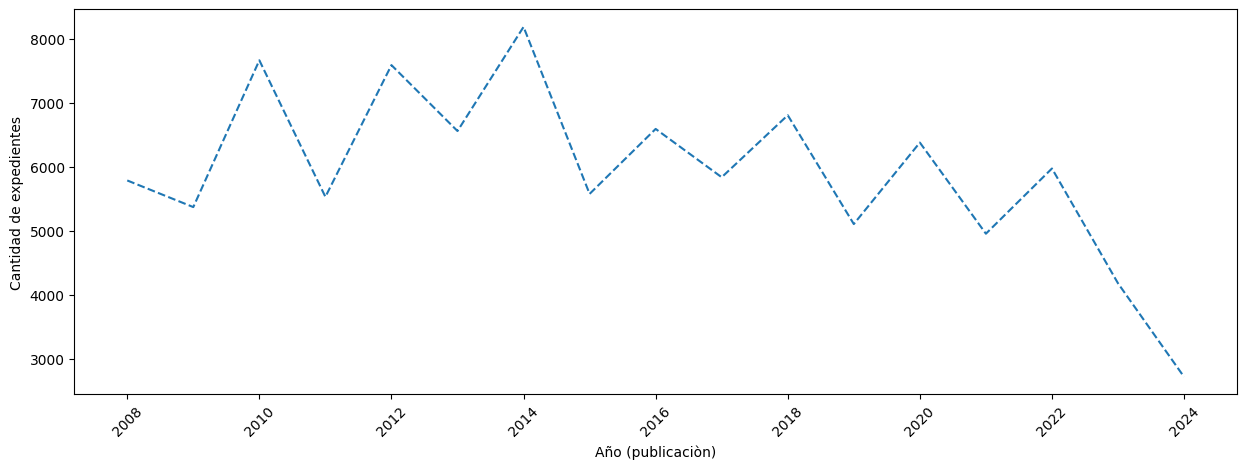

In [22]:
#temp = proyecto_df['año'].value_counts()
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=temp.index, y=temp.values, palette="tab10", linestyle='--')
plt.xlabel("Año (publicaciòn)")
plt.ylabel("Cantidad de expedientes")
plt.xticks(rotation=45)
ax

<Axes: xlabel='Año (publicaciòn)', ylabel='Cantidad de expedientes'>

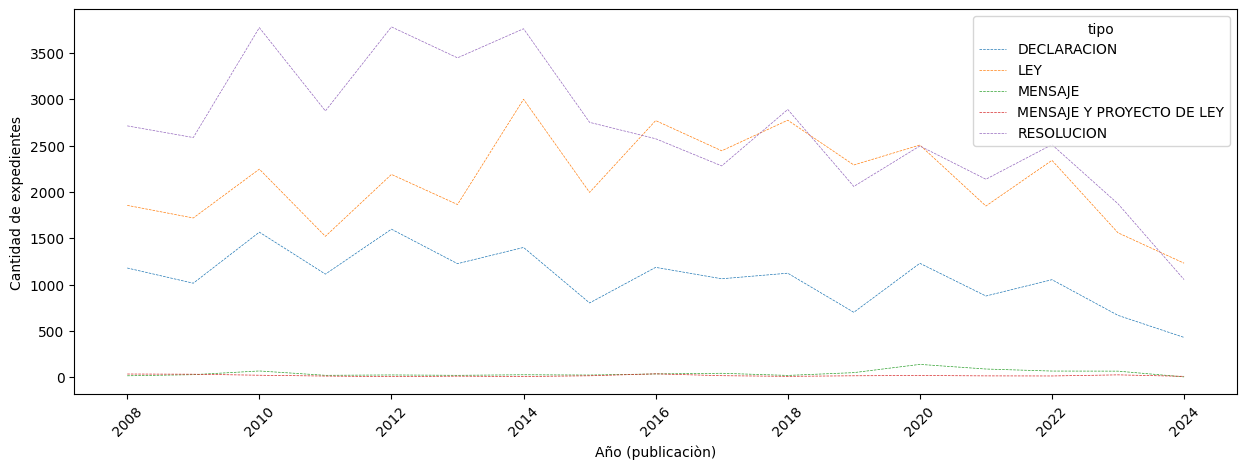

In [23]:
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='año', y='proyecto_id', hue='tipo', data=ano_mes_df,palette="tab10", linewidth=0.5,linestyle='--')
plt.xlabel("Año (publicaciòn)")
plt.ylabel("Cantidad de expedientes")
plt.xticks(rotation=45)
ax

In [24]:
# Controlar proyectos por tipo y comisiones salud
pd.crosstab(proyecto_df.tipo, proyecto_df.proyecto_girado_a_comisiones_SALUD, margins = True)

proyecto_girado_a_comisiones_SALUD,COMISIONES DE SALUD,OTRAS COMISIONES,SIN COMISION ASOCIADA,All
tipo,,,,
DECLARACION,1478,16379,357,18214
LEY,4446,30532,1158,36136
MENSAJE,3,722,2,727
MENSAJE Y PROYECTO DE LEY,8,277,8,293
RESOLUCION,4590,40034,919,45543
All,10525,87944,2444,100913


In [25]:
# Controlar proyectos por tipo y comisiones salud
pd.crosstab(proyecto_df.tipo, proyecto_df.proyecto_girado_a_comisiones_SALUD,  normalize='all',margins = True)

proyecto_girado_a_comisiones_SALUD,COMISIONES DE SALUD,OTRAS COMISIONES,SIN COMISION ASOCIADA,All
tipo,,,,
DECLARACION,0.014646,0.162308,0.003538,0.180492
LEY,0.044058,0.302558,0.011475,0.358091
MENSAJE,0.000030,0.007155,0.000020,0.007204
MENSAJE Y PROYECTO DE LEY,0.000079,0.002745,0.000079,0.002903
RESOLUCION,0.045485,0.396718,0.009107,0.451310
All,0.104298,0.871483,0.024219,1.000000


<Axes: xlabel='Año (publicaciòn)', ylabel='Cantidad de expedientes'>

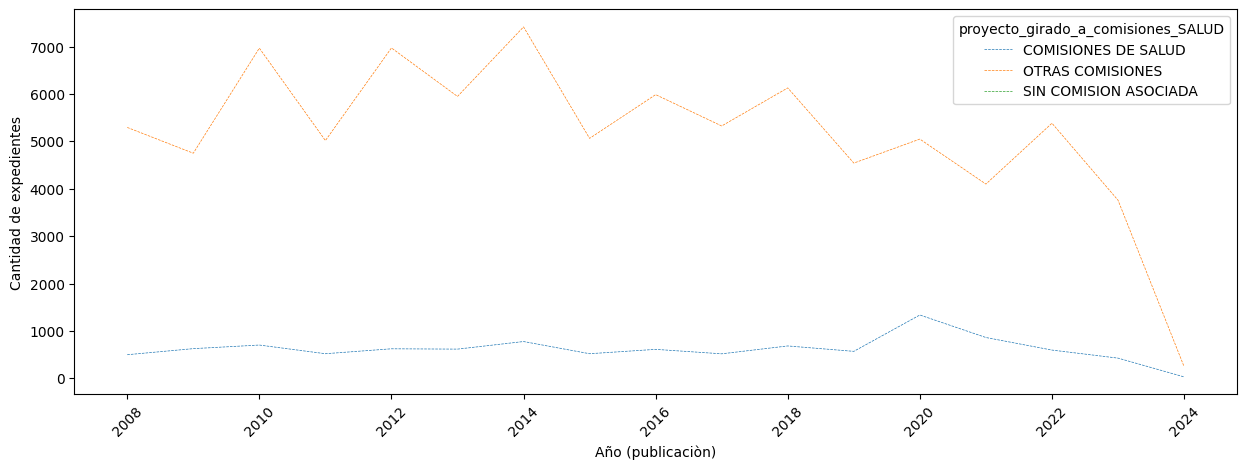

In [26]:
ano_mes_df = pd.pivot_table(proyecto_df, values=['proyecto_id'], index=['año','proyecto_girado_a_comisiones_SALUD'],
                       aggfunc={'proyecto_id': "count"}).reset_index()
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='año', y='proyecto_id', hue='proyecto_girado_a_comisiones_SALUD', data=ano_mes_df,palette="tab10", linewidth=0.5,linestyle='--')
plt.xlabel("Año (publicaciòn)")
plt.ylabel("Cantidad de expedientes")
plt.xticks(rotation=45)
ax

<Axes: xlabel='Año (publicaciòn)', ylabel='Cantidad de expedientes'>

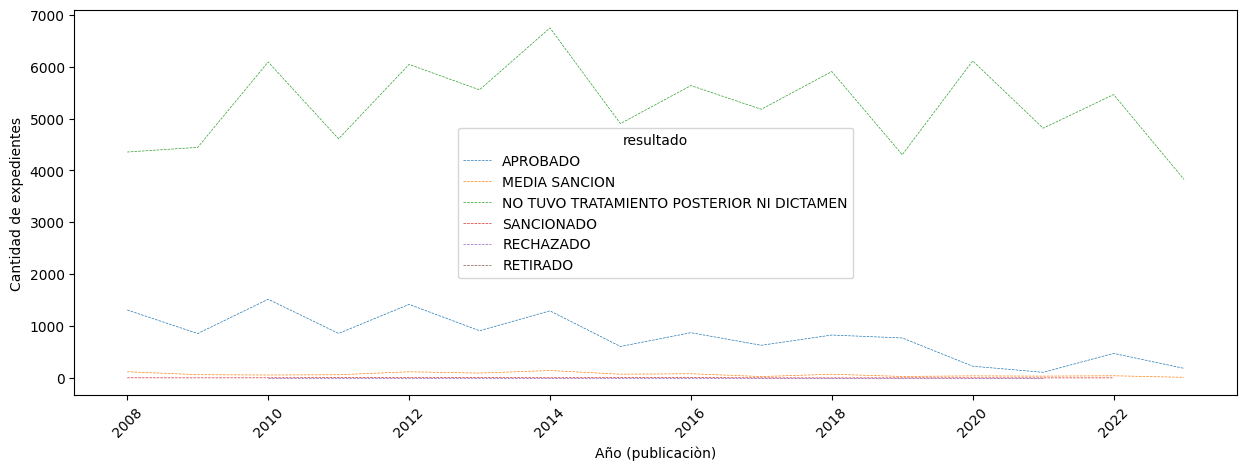

In [27]:
ano_mes_df = pd.pivot_table(proyecto_df, values=['proyecto_id'], index=['año','resultado'],
                       aggfunc={'proyecto_id': "count"}).reset_index()
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='año', y='proyecto_id', hue='resultado', data=ano_mes_df,palette="tab10", linewidth=0.5,linestyle='--')
plt.xlabel("Año (publicaciòn)")
plt.ylabel("Cantidad de expedientes")
plt.xticks(rotation=45)
ax

In [28]:
pd.crosstab(proyecto_df.resultado, proyecto_df.proyecto_girado_a_comisiones_SALUD,  normalize='all',margins = True)

proyecto_girado_a_comisiones_SALUD,COMISIONES DE SALUD,OTRAS COMISIONES,All
resultado,,,
APROBADO,0.006992,0.124297,0.131289
MEDIA SANCION,0.001439,0.009452,0.010891
NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.098370,0.758949,0.857319
RECHAZADO,0.000000,0.000031,0.000031
RETIRADO,0.000000,0.000020,0.000020
SANCIONADO,0.000082,0.000367,0.000449
All,0.106883,0.893117,1.000000


In [29]:
# Controlar proyectos por tipo y comisiones salud
pd.crosstab(proyecto_df.resultado, proyecto_df.proyecto_girado_a_comisiones_SALUD,  normalize='columns',margins = True)

proyecto_girado_a_comisiones_SALUD,COMISIONES DE SALUD,OTRAS COMISIONES,All
resultado,,,
APROBADO,0.065419,0.139172,0.131289
MEDIA SANCION,0.013466,0.010583,0.010891
NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.920351,0.849776,0.857319
RECHAZADO,0.000000,0.000034,0.000031
RETIRADO,0.000000,0.000023,0.000020
SANCIONADO,0.000764,0.000411,0.000449
